<a href="https://colab.research.google.com/github/danm00nster/PWML_PROJECT/blob/main/2ML_Daniel_Kwiecinski.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [243]:
!git clone https://github.com/danm00nster/PWML_PROJECT

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

fatal: destination path 'PWML_PROJECT' already exists and is not an empty directory.


In [244]:
Cars=pd.read_csv('PWML_PROJECT/car_data.csv')


In [245]:
Cars.info()

Cars_Copy=Cars

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   User ID       1000 non-null   int64  
 1   Gender        1000 non-null   object 
 2   Age           998 non-null    float64
 3   AnnualSalary  997 non-null    float64
 4   Purchased     1000 non-null   int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 39.2+ KB


In [246]:
Cars=Cars.drop(columns="User ID")
Cars_Copy=Cars
Cars.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,998.0,40.096192,10.712190,18.0,32.0,40.0,48.0,63.0
AnnualSalary,997.0,72676.529589,34442.839132,15000.0,46500.0,72000.0,90000.0,152500.0
Purchased,1000.0,0.402000,0.490547,0.0,0.0,0.0,1.0,1.0


In [247]:
Cars["Age"]=Cars["Age"].fillna(Cars["Age"].median())
Cars["AnnualSalary"]=Cars["AnnualSalary"].fillna(Cars["AnnualSalary"].median())

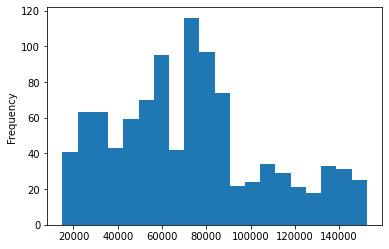

In [248]:
Cars['AnnualSalary'].plot(kind='hist',bins=20)

In [249]:
for columns in ["Age","AnnualSalary","Purchased"]:   
    print(Cars[columns].groupby(Cars['Gender']).mean())

Gender
Female    40.986434
Male      39.146694
Name: Age, dtype: float64
Gender
Female    74676.356589
Male      70540.289256
Name: AnnualSalary, dtype: float64
Gender
Female    0.424419
Male      0.378099
Name: Purchased, dtype: float64


Purchased
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: AnnualSalary, dtype: object

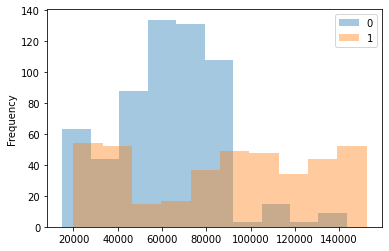

In [250]:
Cars.groupby('Purchased').AnnualSalary.plot(kind='hist',legend=True,alpha=0.4)

In [251]:
print(Cars["Purchased"].groupby(Cars['Gender']).value_counts())

Gender  Purchased
Female  0            297
        1            219
Male    0            301
        1            183
Name: Purchased, dtype: int64


Gender
Female    AxesSubplot(0.125,0.125;0.775x0.755)
Male      AxesSubplot(0.125,0.125;0.775x0.755)
Name: AnnualSalary, dtype: object

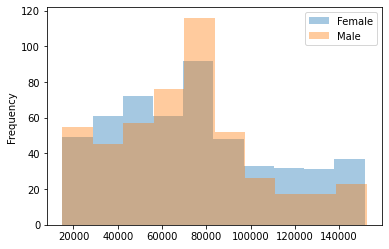

In [252]:

Cars.groupby('Gender').AnnualSalary.plot(kind='hist',legend=True,alpha=0.4)

In [253]:
Cars.head()

,Gender,Age,AnnualSalary,Purchased
0,Male,35.0,20000.0,0
1,Male,40.0,43500.0,0
2,Male,49.0,74000.0,0
3,Male,40.0,107500.0,1
4,Male,25.0,79000.0,0


In [254]:
Cars.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,40.096,10.701463,18.0,32.0,40.0,48.0,63.0
AnnualSalary,1000.0,72674.500,34391.104196,15000.0,46500.0,72000.0,90000.0,152500.0
Purchased,1000.0,0.402,0.490547,0.0,0.0,0.0,1.0,1.0


In [255]:
Cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Gender        1000 non-null   object 
 1   Age           1000 non-null   float64
 2   AnnualSalary  1000 non-null   float64
 3   Purchased     1000 non-null   int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 31.4+ KB


In [256]:
y=Cars.pop("Purchased")
for col in Cars.columns:
    Cars[col] = Cars[col].astype('category')



---



In [257]:
Cars=pd.get_dummies(Cars,columns=['Gender'],drop_first=False)

In [258]:
X=Cars

In [259]:
X.describe().T


,count,mean,std,min,25%,50%,75%,max
Gender_Female,1000.0,0.516,0.499994,0.0,0.0,1.0,1.0,1.0
Gender_Male,1000.0,0.484,0.499994,0.0,0.0,0.0,1.0,1.0


In [260]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Age            1000 non-null   category
 1   AnnualSalary   1000 non-null   category
 2   Gender_Female  1000 non-null   uint8   
 3   Gender_Male    1000 non-null   uint8   
dtypes: category(2), uint8(2)
memory usage: 16.4 KB


In [261]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify=y)
y_train.value_counts()

0    448
1    302
Name: Purchased, dtype: int64

In [262]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [263]:
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

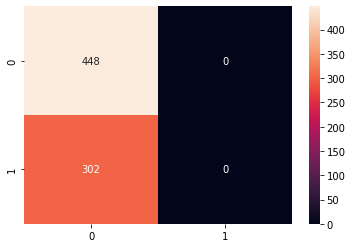

In [264]:
cm_train = confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm_train, annot=True, fmt='d')
plt.show()

In [265]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_train = accuracy_score(y_train, y_pred_train)

precision_train = precision_score(y_train, y_pred_train, average = 'weighted')
recall_train = recall_score(y_train, y_pred_train, average= 'weighted')
f1_train = f1_score(y_train,y_pred_train,average='weighted')

print(f'Accuracy: {accuracy_train}')
print(f'Precision: {precision_train}')
print(f'Recall: {recall_train}')
print(f'F1score: {f1_train}')

Accuracy: 0.5973333333333334
Precision: 0.35680711111111113
Recall: 0.5973333333333334
F1score: 0.44675347801892046


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Regresja Logistyczne nie poradziła sobie zbyt dobrze. Wynik są nieakceptowale. Spróbujmy ustanadryzować wiek i roczne wynagrodzenie i wykonajmy uczenie jeszcze raz na już ustandaryzowanych danych

In [266]:
Cars=Cars_Copy

Standaryzacja wieku i średnich zarobków

---



In [267]:
Cars_val=Cars[['Age','AnnualSalary']]

In [268]:
Cars_gender=pd.get_dummies(Cars[['Gender']])
scaler=StandardScaler()
scaler.fit(Cars_val)
Cars_scaled=scaler.transform(Cars_val)
Cars_scaled=pd.DataFrame(Cars_scaled,index=Cars_val.index,columns=Cars_val.columns)
X=pd.concat([Cars_scaled,Cars_gender], axis=1)


In [269]:
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            1000 non-null   float64
 1   AnnualSalary   1000 non-null   float64
 2   Gender_Female  1000 non-null   uint8  
 3   Gender_Male    1000 non-null   uint8  
dtypes: float64(2), uint8(2)
memory usage: 17.7 KB


In [270]:
X.describe().T


,count,mean,std,min,25%,50%,75%,max
Age,1000.0,3.304024e-16,1.000500,-2.065798,-0.756911,-0.008975,0.738960,2.141339
AnnualSalary,1000.0,0.000000e+00,1.000500,-1.677857,-0.761464,-0.019622,0.504031,2.322270
Gender_Female,1000.0,5.160000e-01,0.499994,0.000000,0.000000,1.000000,1.000000,1.000000
Gender_Male,1000.0,4.840000e-01,0.499994,0.000000,0.000000,0.000000,1.000000,1.000000


In [271]:
X.head(10)

,Age,AnnualSalary,Gender_Female,Gender_Male
0,-0.476435,-1.532398,0,1
1,-0.008975,-0.848740,0,1
2,0.832452,0.038561,0,1
3,-0.008975,1.013138,0,1
4,-1.411354,0.184020,0,1
5,0.645468,-1.139658,1,0
6,0.551976,1.740434,1,0
7,0.178009,-0.252357,0,1
8,-0.943894,0.344026,1,0
9,0.084517,-0.601459,0,1


Widzimy, że wiek i Srednie zarobki nie mają już wartości w innych skalach. Zobaczmy jak z takimi danymi poradzi sobie regresja logistyczna

In [272]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify=y)
y_train.value_counts()

0    448
1    302
Name: Purchased, dtype: int64

In [273]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [274]:
pred_train = model.predict(X_train)
pred = model.predict(X_test)

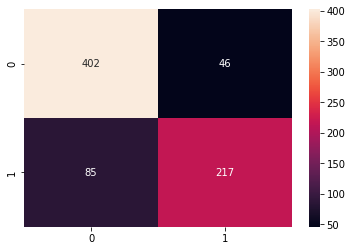

In [275]:
cm_train = confusion_matrix(y_train, pred_train)
sns.heatmap(cm_train, annot=True, fmt='d')
plt.show()

Już na piwerwszy rzut oka widać że wyniki są zdecydowanie lepsze. Sprawdźmy jak wygląda to w szczegółach

In [276]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_train = accuracy_score(y_train, pred_train)

precision_train = precision_score(y_train, pred_train, average = 'weighted')
recall_train = recall_score(y_train, pred_train, average= 'weighted')
f1_train = f1_score(y_train,pred_train,average='weighted')

print(f'Accuracy: {accuracy_train}')
print(f'Precision: {precision_train}')
print(f'Recall: {recall_train}')
print(f'F1score: {f1_train}')

Accuracy: 0.8253333333333334
Precision: 0.8253142516584557
Recall: 0.8253333333333334
F1score: 0.8229477954979256


Jak widzimy po standaryzacj wyniki są na przyzwoitym poziomie. Spróbujmy jeszcze je poprawić stosują SVC

In [277]:
svm=SVC(C=0.1,kernel='linear')
svm.fit(X_train,y_train)
pred = svm.predict(X_test)
pred_train = svm.predict(X_train)


In [278]:
accuracy_train = accuracy_score(y_train, pred_train)

precision_train = precision_score(y_train, pred_train, average = 'weighted')
recall_train = recall_score(y_train, pred_train, average= 'weighted')
f1_train = f1_score(y_train,pred_train,average='weighted')

print(f'Accuracy: {accuracy_train}')
print(f'Precision: {precision_train}')
print(f'Recall: {recall_train}')
print(f'F1score: {f1_train}')

Accuracy: 0.8226666666666667
Precision: 0.8240961710938477
Recall: 0.8226666666666667
F1score: 0.819264530674259


Zastosowana metodanie nie zmieniła w sposób znaczący naszych wyników.Zanjadżmy w takim razie najlepsze parametry i najlepsze jądro dla naszej Maszyny Wektorów Nośnych.

In [279]:
from sklearn.model_selection import GridSearchCV
svm = SVC(kernel='rbf')
parameters = {'gamma':[0.001, 0.1, 1],
              'C' : [5, 10, 50],
              'kernel': ['rbf','linear','poly']}
searcher = GridSearchCV(svm, parameters, scoring  = 'f1_macro')
searcher.fit(X_train, y_train)
pred = searcher.predict(X_test)
pred_train = searcher.predict(X_train)
#Accuracy_test
print(accuracy_score(y_test, pred))
#Accuracy_train
print(accuracy_score(y_train, pred_train))
# Report the best parameters
print("Best CV params", searcher.best_params_)

0.9
0.9213333333333333
Best CV params {'C': 10, 'gamma': 1, 'kernel': 'rbf'}


In [280]:
svm=SVC(C=10,kernel='rbf',gamma=1)
svm.fit(X_train,y_train)
pred = svm.predict(X_test)
pred_train = svm.predict(X_train)

In [281]:
accuracy_train = accuracy_score(y_train, pred_train)

precision_train = precision_score(y_train, pred_train, average = 'weighted')
recall_train = recall_score(y_train, pred_train, average= 'weighted')
f1_train = f1_score(y_train,pred_train,average='weighted')

print(f'Accuracy: {accuracy_train}')
print(f'Precision: {precision_train}')
print(f'Recall: {recall_train}')
print(f'F1score: {f1_train}')

Accuracy: 0.9213333333333333
Precision: 0.9221678839409957
Recall: 0.9213333333333333
F1score: 0.9215479674796747


Wynik Jest już bardzo dbry. Można jeszcze próbować go poprawić zwiękaszjąc zakres przeszukiwanych parametrów C czy gamma lub stosując inne jądra